# Ex 6.5 Unsupervised ML - Clustering 
Contents - 
- 01 Import librabries, data and cleaning 
- 02 Combining PCA and K-means (standardising)
- 03 Elbow Technique 
- 04 K-means Clustering 

## 01 Import libraries, data and drop categorical columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
# Define path

path = r'//Users/amypalomino/Documents/June 22 Final Project/02 Data'

In [4]:
# Import dataframe 

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Natural_Disasters_Final_Clean.csv'),
                index_col = False)

In [5]:
df.shape

(14644, 42)

In [6]:
df.head(5)

,Unnamed: 0,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI,Deaths
0,0,1970-0013-ARG,1970,13,Natural,Hydrological,Flood,NaN,NaN,NaN,...,36.0,0.0,0.0,0.0,0.0,NaN,NaN,25000.0,15.001282,Low Death Toll
1,1,1970-0109-AUS,1970,109,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,13.0,0.0,0.0,0.0,0.0,NaN,NaN,72475.0,15.001282,Low Death Toll
2,2,1970-0044-BEN,1970,44,Natural,Hydrological,Flood,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,200.0,15.001282,NaN
3,3,1970-0063-BGD,1970,63,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,300000.0,0.0,3648000.0,0.0,3648000.0,NaN,NaN,86400.0,15.001282,Very High Death Toll
4,4,1970-0026-BGD,1970,26,Natural,Meteorological,Storm,NaN,NaN,NaN,...,17.0,0.0,110.0,0.0,110.0,NaN,NaN,NaN,15.001282,Low Death Toll


In [7]:
# Drop Unnamed column
df =df.drop(columns = ['Unnamed: 0'])

In [8]:
# Enable max columns to be displayed 

pd.options.display.max_columns = None

In [9]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Start Year', 'Start Month',
       'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths',
       'No Injured', 'No Affected', 'No Homeless', 'Total Affected',
       'Reconstruction Costs US$', 'Insured Damages US$', 'Total Damages US$',
       'CPI', 'Deaths'],
      dtype='object')

In [10]:
df.dtypes

Dis No                       object
Year                          int64
Seq                           int64
Disaster Group               object
Disaster Subgroup            object
Disaster Type                object
Disaster Subtype             object
Disaster Subsubtype          object
Event Name                   object
Country                      object
ISO                          object
Region                       object
Continent                    object
Location                     object
Origin                       object
Associated Dis               object
Associated Dis2              object
OFDA Response               float64
Appeal                      float64
Declaration                 float64
Aid Contribution            float64
Dis Mag Value               float64
Dis Mag Scale                object
Latitude                     object
Longitude                    object
Start Year                    int64
Start Month                 float64
Start Day                   

In [11]:
df.isnull().sum()

Dis No                          0
Year                            0
Seq                             0
Disaster Group                  0
Disaster Subgroup               0
Disaster Type                   0
Disaster Subtype             2747
Disaster Subsubtype         13600
Event Name                  10999
Country                         0
ISO                             0
Region                          0
Continent                       0
Location                     1346
Origin                      10864
Associated Dis              11412
Associated Dis2             13946
OFDA Response                   0
Appeal                          0
Declaration                     0
Aid Contribution            13967
Dis Mag Value                   0
Dis Mag Scale                1073
Latitude                    12313
Longitude                   12309
Start Year                      0
Start Month                   268
Start Day                    3067
End Year                        0
End Month     

### Replacing NaN with 0

In [12]:
df['Aid Contribution'].fillna(0, inplace = True)

In [13]:
df['Start Month'].fillna(0, inplace = True)
df['Start Day'].fillna(0, inplace = True)
df['End Month'].fillna(0, inplace = True)
df['End Day'].fillna(0, inplace = True)
df['Reconstruction Costs US$'].fillna(0, inplace = True)
df['Insured Damages US$'].fillna(0, inplace = True)
df['Total Damages US$'].fillna(0, inplace = True)
df['CPI'].fillna(0, inplace = True)

In [14]:
df.isnull().sum()

Dis No                          0
Year                            0
Seq                             0
Disaster Group                  0
Disaster Subgroup               0
Disaster Type                   0
Disaster Subtype             2747
Disaster Subsubtype         13600
Event Name                  10999
Country                         0
ISO                             0
Region                          0
Continent                       0
Location                     1346
Origin                      10864
Associated Dis              11412
Associated Dis2             13946
OFDA Response                   0
Appeal                          0
Declaration                     0
Aid Contribution                0
Dis Mag Value                   0
Dis Mag Scale                1073
Latitude                    12313
Longitude                   12309
Start Year                      0
Start Month                     0
Start Day                       0
End Year                        0
End Month     

### Removing categorical columns

In [15]:
df_2 = df.drop(columns = ['Year','Seq','Dis No', 'Disaster Group', 'Disaster Subgroup','Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype','Event Name', 'Country', 
                          'ISO', 'Region', 'Continent', 'Location','Origin', 'Associated Dis', 'Associated Dis2','Dis Mag Scale', 'Start Year','End Year','Latitude', 'Longitude','Deaths'])

In [16]:
df_2.shape

(14644, 18)

In [17]:
df_2.head(5)

,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Start Month,Start Day,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI
0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,4.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,25000.0,15.001282
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,72475.0,15.001282
2,1.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,15.001282
3,1.0,0.0,0.0,0.0,0.0,11.0,12.0,11.0,12.0,300000.0,0.0,3648000.0,0.0,3648000.0,0.0,0.0,86400.0,15.001282
4,0.0,0.0,0.0,0.0,0.0,4.0,13.0,4.0,13.0,17.0,0.0,110.0,0.0,110.0,0.0,0.0,0.0,15.001282


In [18]:
df_2.isnull().sum()

OFDA Response               0
Appeal                      0
Declaration                 0
Aid Contribution            0
Dis Mag Value               0
Start Month                 0
Start Day                   0
End Month                   0
End Day                     0
Total Deaths                0
No Injured                  0
No Affected                 0
No Homeless                 0
Total Affected              0
Reconstruction Costs US$    0
Insured Damages US$         0
Total Damages US$           0
CPI                         0
dtype: int64

## 03 Combining PCA and K-means

In [19]:
# For standardising features, import the Standard Scaler module 
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_2)

### Dimensionality Reduction with PCA

In [21]:
# import PCA module 
from sklearn.decomposition import PCA

In [22]:
pca = PCA()
pca.fit(df_std)

PCA()

In [23]:
# how much variance is explained by the 22 components
pca.explained_variance_ratio_

array([1.25697992e-01, 1.15522623e-01, 9.79892337e-02, 8.50403383e-02,
       7.28833127e-02, 6.70138864e-02, 6.07698550e-02, 5.55334697e-02,
       5.50306409e-02, 5.07463356e-02, 4.67019723e-02, 4.58486810e-02,
       4.43343153e-02, 4.10092167e-02, 1.53047073e-02, 1.15793745e-02,
       8.99404550e-03, 4.10740918e-32])

Text(0, 0.5, 'Cumulative Exlpained Varaince')

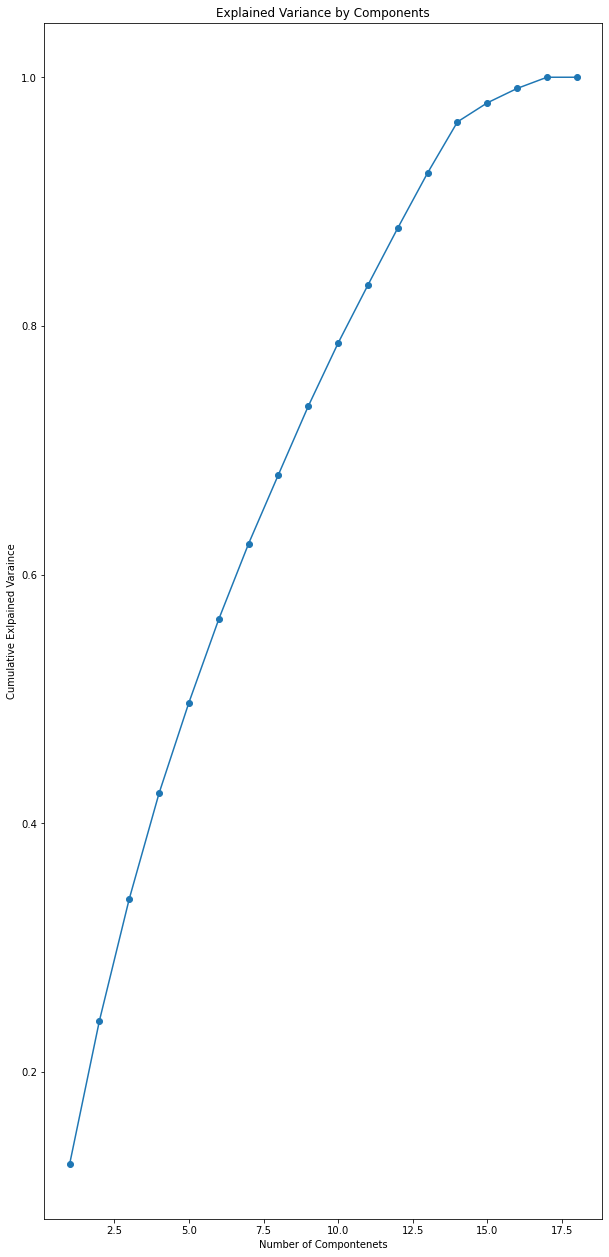

In [24]:
plt.figure(figsize = (10,22))
plt.plot(range(1,19), pca.explained_variance_ratio_.cumsum(),marker = 'o')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Compontenets')
plt.ylabel('Cumulative Exlpained Varaince')

In [25]:
# Preserving 80% of the variance - 10 components 
pca= PCA(n_components = 10)

In [26]:
# Fit the 10 components to the model
pca.fit(df_std)

PCA(n_components=10)

In [27]:
pca.transform(df_std)

array([[ 1.02209685e-01, -2.69695156e+00,  3.64627115e-01, ...,
         1.88817371e-02,  1.76577660e-01,  1.35483579e-01],
       [ 1.58012053e-01, -3.04075474e+00,  3.78015006e-01, ...,
         1.98287286e-03,  1.65562122e-01,  1.16422918e-01],
       [ 3.29850498e-01, -8.51159971e-01, -4.05350643e-01, ...,
         3.53928027e-02,  5.75844320e-01,  3.99401325e-01],
       ...,
       [ 2.57368153e-02,  1.98377786e-01,  8.03482851e-02, ...,
        -6.89086826e-02, -5.16798345e-01,  5.27099794e-01],
       [ 2.53730574e-01, -2.00712489e+00,  9.71873650e-01, ...,
        -2.36169497e-02, -5.41443670e-01,  4.95055235e-01],
       [ 9.97016398e-03, -9.51886058e-01, -4.33235779e-01, ...,
        -3.89540300e-03,  2.70978040e-01,  2.22263493e-01]])

In [28]:
scores_pca = pca.transform(df_std)

### K-means clustering with PCA 

In [29]:
# Fit k-means using the transformed data from the PCA

wcss = []      # WCSS (Within Cluster Sum of Squares)
for i in range(1,19): # 22 potential clusters 
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

## 04 The elbow technique

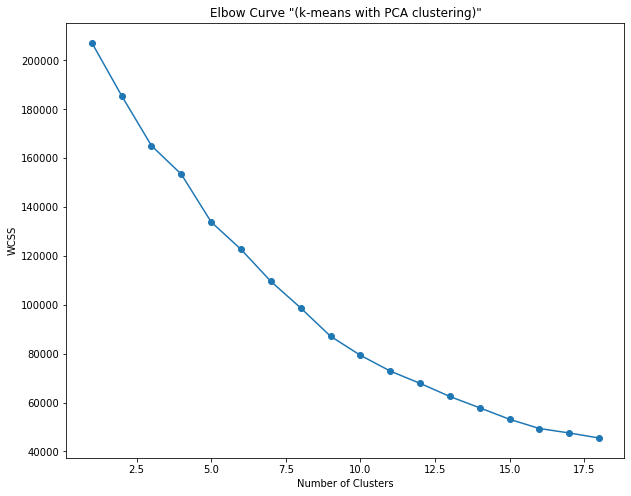

In [30]:
# Plot the wcss to demonstrate the elbow curve 
plt.figure(figsize = (10,8))
plt.plot(range(1,19), wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve "(k-means with PCA clustering)"')
plt.show()

### Number of clusters
- The elbow curve is smoother making the choice of clusters more difficult. There's a bit of a drop after the 3rd so I'm going to opt for 3 clusters.

## 04 K-means Clustering 

In [31]:
# Using 3 clusters 

kmeans_pca = KMeans(n_clusters = 3, n_jobs = -1)

In [32]:
# Fit data with the k-means pca model 

kmeans_pca.fit(scores_pca)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [33]:
# Create new df with original features and add the PCA scores and clusters 

df_new = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_new.columns.values[-7:] = ['Component 1','Component 2', 'Component 3','Component 4','Component 5','Component 6','Component 7']

df_new['Clusters'] = kmeans_pca.labels_

In [34]:
df_new.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI,Deaths,0,1,2,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Clusters
0,1970-0013-ARG,1970,13,Natural,Hydrological,Flood,NaN,NaN,NaN,Argentina,ARG,South America,Americas,Mendoza,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Km2,NaN,NaN,1970,1.0,4.0,1970,1.0,4.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,25000.0,15.001282,Low Death Toll,0.102210,-2.696952,0.364627,-0.261677,-0.283369,0.826843,-1.103403,0.018882,0.176578,0.135484,1
1,1970-0109-AUS,1970,109,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,Australia,AUS,Australia and New Zealand,Oceania,Queensland,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1970,1.0,0.0,1970,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,72475.0,15.001282,Low Death Toll,0.158012,-3.040755,0.378015,0.154782,-0.331429,0.789604,-1.000372,0.001983,0.165562,0.116423,1
2,1970-0044-BEN,1970,44,Natural,Hydrological,Flood,NaN,NaN,NaN,Benin,BEN,Western Africa,Africa,Atacora region,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,Km2,NaN,NaN,1970,9.0,0.0,1970,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,15.001282,NaN,0.329850,-0.851160,-0.405351,2.442605,1.224090,-0.003490,-2.590677,0.035393,0.575844,0.399401,2
3,1970-0063-BGD,1970,63,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1970,11.0,12.0,1970,11.0,12.0,300000.0,0.0,3648000.0,0.0,3648000.0,0.0,0.0,86400.0,15.001282,Very High Death Toll,6.089031,1.640391,3.585918,4.075379,25.449696,22.933713,2.930923,-0.639244,4.237170,-0.899739,2
4,1970-0026-BGD,1970,26,Natural,Meteorological,Storm,NaN,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1970,4.0,13.0,1970,4.0,13.0,17.0,0.0,110.0,0.0,110.0,0.0,0.0,0.0,15.001282,Low Death Toll,-0.113091,-1.042166,0.014634,-0.435215,-0.180136,0.892985,-1.369025,0.043620,0.210427,0.189244,1


In [35]:
df_new['Clusters'].value_counts()

2    7971
1    6643
0      30
Name: Clusters, dtype: int64

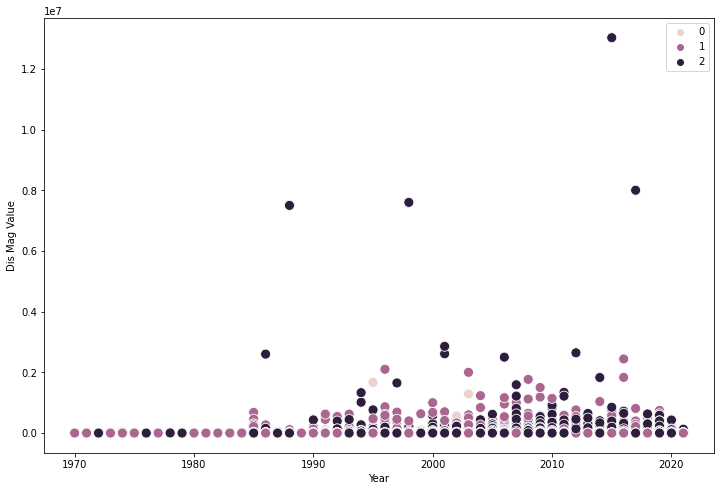

In [36]:
# Plot the clusters for 'Year' and 'Mag Value'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Year'], y= df_new['Dis Mag Value'], hue=kmeans_pca.labels_, s= 100)

ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Dis Mag Value')
plt.show()

### Thoughts
- The dark purple is the only cluster falling at the top of the chart

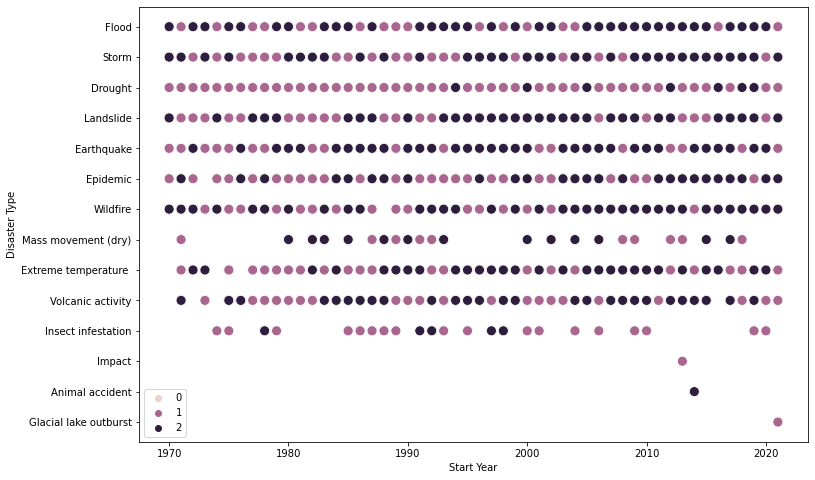

In [37]:
# Plot the clusters for 'Year' and 'Disaster Type'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Start Year'], y= df_new['Disaster Type'], hue=kmeans_pca.labels_, s= 100)

ax.grid(False)
plt.xlabel('Start Year')
plt.ylabel('Disaster Type')
plt.show()

### Thoughts - 
- Drought shows a higher number of the purple cluster 
- There is no obvoius correlation besides this 

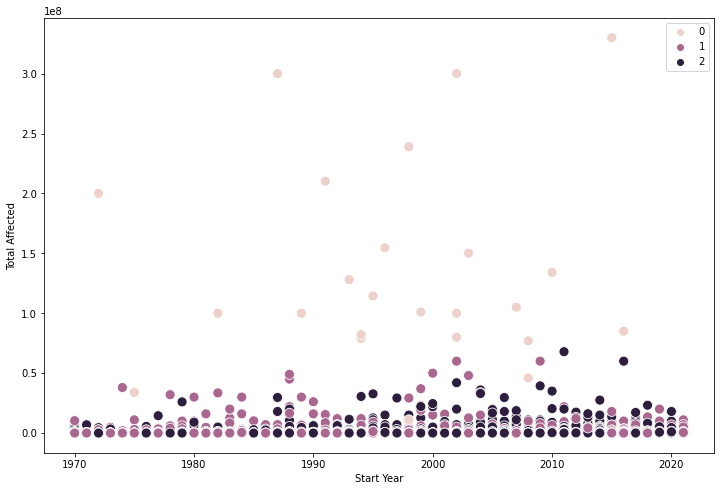

In [38]:
# Plot the clusters for 'Year' and 'Total Affected'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Start Year'], y= df_new['Total Affected'], hue=kmeans_pca.labels_, s= 100)

ax.grid(False)
plt.xlabel('Start Year')
plt.ylabel('Total Affected')
plt.show()

### Thoughts - 
- This scatter chart reveals some really interesting insights and finally sheds some light onto what the clusters might be grouping. The pink cluster dominates the top half of the chart indicating these are disasters affecting the most people. They don't follow any sort of trend though. 
- It looks like there might be a larger porportion of the dark purple falling in the later years

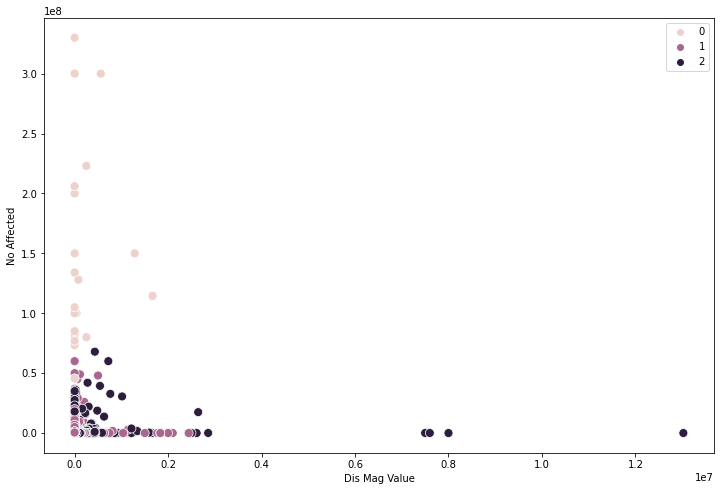

In [39]:
# Plot the clusters for 'No Affected' and 'Dis Mag Value'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Dis Mag Value'], y= df_new['No Affected'], hue=kmeans_pca.labels_, s= 80)

ax.grid(False)
plt.xlabel('Dis Mag Value')
plt.ylabel('No Affected')
plt.show()

### Thoughts - 
- Disaster Magnitude doesn't show a strong correlation with the no affected but the clusters are still indicating a significant difference between the the darker purple and the pink. I think this falls to the No affected again but also indicates the dark purple correlates with a higher dis mag value  

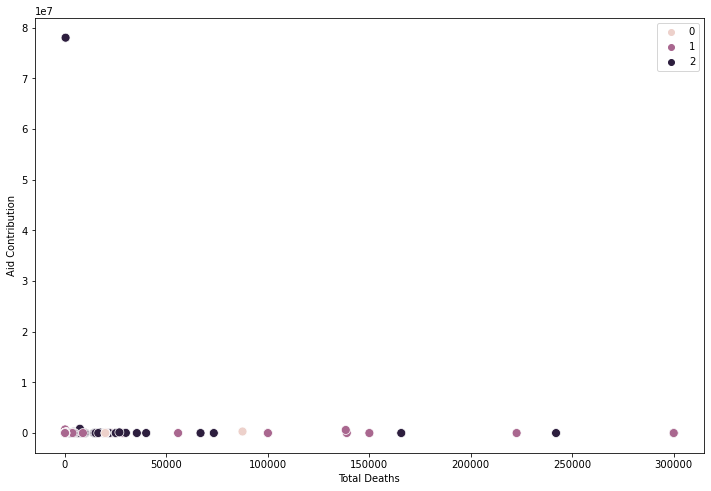

In [40]:
# Plot the clusters for 'Total Deaths' and 'Aid Contribution'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Total Deaths'], y= df_new['Aid Contribution'], hue=kmeans_pca.labels_, s= 80)

ax.grid(False)
plt.xlabel('Total Deaths')
plt.ylabel('Aid Contribution')
plt.show()

### Thoughts - 
- This isn't very insightful. Aid contribution doesn't have enough records to begin with to make a meaningful comparission with any other variable in the first place. 

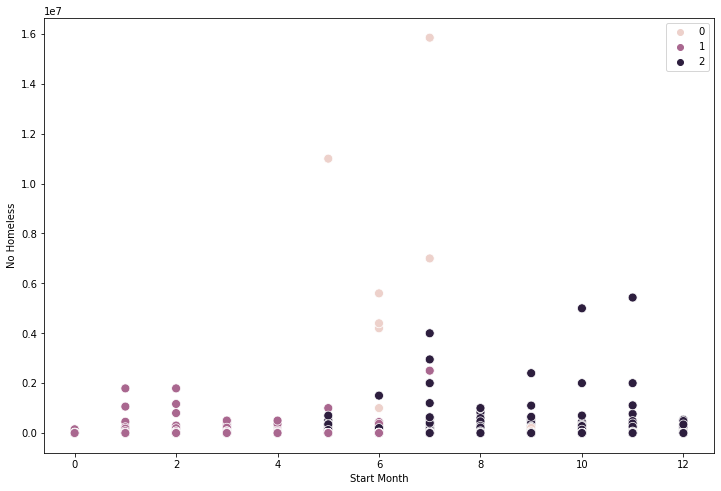

In [41]:
# Plot the clusters for 'No Homeless' and 'Start Month'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Start Month'], y= df_new['No Homeless'], hue=kmeans_pca.labels_, s= 80)

ax.grid(False)
plt.xlabel('Start Month')
plt.ylabel('No Homeless')
plt.show()

### Thoughts - 
- This is quite intersting, there os a clear divide between the 2 halves of the year. 
- The pink cluster falls maining around May - July 
- This is worth exploring further

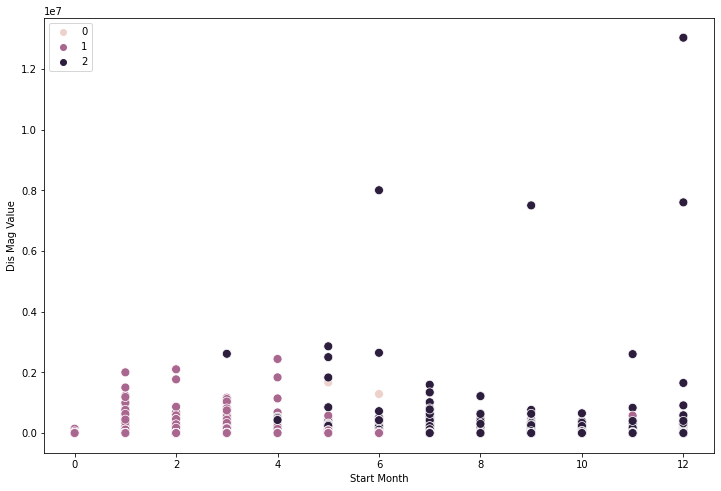

In [42]:
# Plot the clusters for 'Dis Mag Value' and 'Start Month'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Start Month'], y= df_new['Dis Mag Value'], hue=kmeans_pca.labels_, s= 80)

ax.grid(False)
plt.xlabel('Start Month')
plt.ylabel('Dis Mag Value')
plt.show()

### Thoughts - 
- I'm not sure what to infer by this -the year is divided in two again with a slight correlation between the purple and dis mag value being larger later on in the year

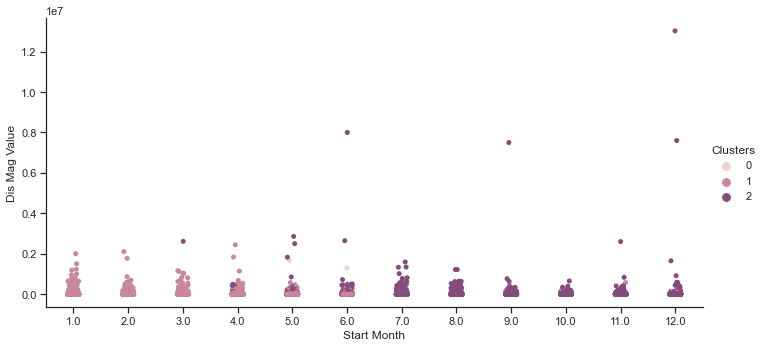

In [43]:
sns.set(style='ticks')
g = sns.catplot(x='Start Month', y='Dis Mag Value', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4), height = 5, aspect = 2)
g = g.set(xlim=(.5,12.5))

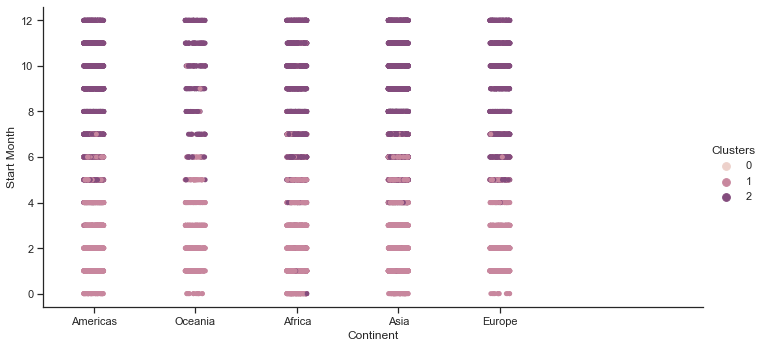

In [44]:
sns.set(style='ticks')
g = sns.catplot(x='Continent', y='Start Month', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4), height = 5, aspect = 2)
g = g.set(xlim=(-.5,6))

### Thoughts - 
- I don't get a huge amount out of this. Other than the divide of the year again

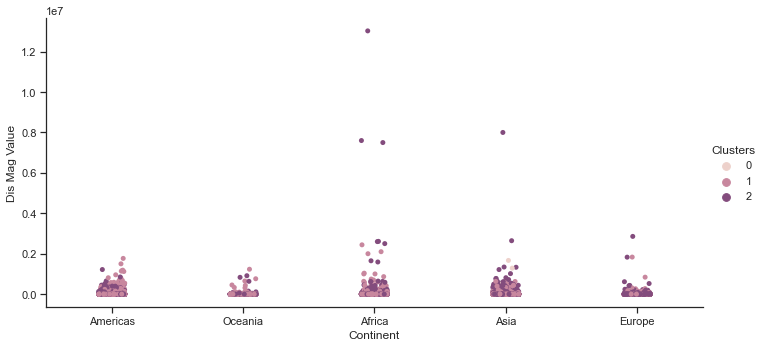

In [45]:
sns.set(style='ticks')
g = sns.catplot(x='Continent', y='Dis Mag Value', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4), height = 5, aspect = 2)
g = g.set(xlim=(-.5,4.5))

### Thoughts - 
- Looks like most continents contain both 0 and 1 clusters, whereas Asia has 3 present. If the bright purple hue does indicate the number of people affected, it seems that Asia might be the continent that suffers more from this particular outcome following a disaster.

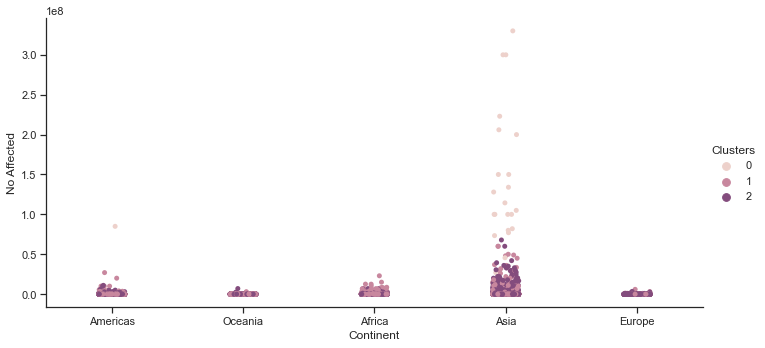

In [46]:
sns.set(style='ticks')
g = sns.catplot(x='Continent', y='No Affected', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4), height = 5, aspect = 2)
g = g.set(xlim=(-.5,4.5))

### Thoughts - 
- This confirms my suspison that Asia is much more affected by disasters than the rest of the world.

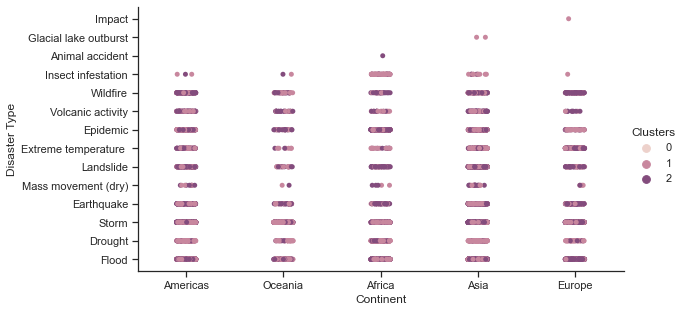

In [47]:
sns.set(style='ticks')
g = sns.catplot(x='Continent', y='Disaster Type', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4),height = 4.5, aspect = 2)
g = g.set(xlim=(-.5,4.5))

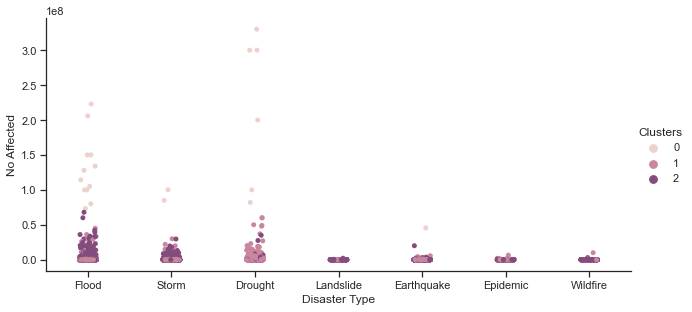

In [48]:
# Plot the clusters for 'Disaster Type' and 'No Affected'

sns.set(style='ticks')
g = sns.catplot(x='Disaster Type', y='No Affected', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4),height = 4.5, aspect = 2)
g = g.set(xlim=(-.5,6.5))

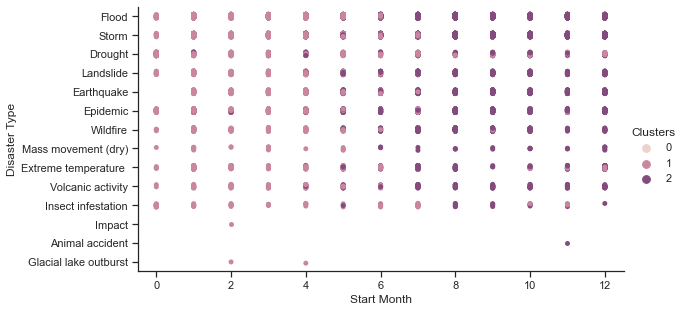

In [50]:
sns.set(style='ticks')
g = sns.catplot(x='Start Month', y='Disaster Type', hue='Clusters', data=df_new, palette=sns.cubehelix_palette(4),height = 4.5, aspect = 2)
g = g.set(xlim=(-.5,12.5))

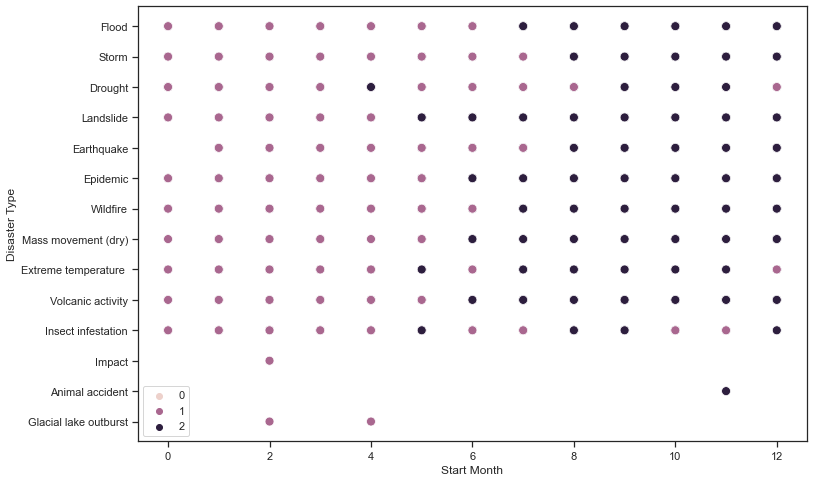

In [51]:
# Plot the clusters for 'Disaster Type' and 'Start Month'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Start Month'], y= df_new['Disaster Type'], hue=kmeans_pca.labels_, s= 80)

ax.grid(False)
plt.xlabel('Start Month')
plt.ylabel('Disaster Type')
plt.show()

### Thoughts - 
- Flood and Drought appear to have the most affect on people, confimred by the clusters. 


In [52]:
# renaming clusters to use groupby function and better distinguish the clusters
df_new.loc[df_new['Clusters'] == 2, 'Cluster'] = 'dark purple'
df_new.loc[df_new['Clusters'] == 1, 'Cluster'] = 'purple'
df_new.loc[df_new['Clusters'] == 0, 'Cluster'] = 'pink'

In [54]:
df_new.groupby('Cluster').agg({'Total Deaths':['mean', 'median'],
                              'Aid Contribution':['mean', 'median'],
                              'No Homeless':['mean', 'median'],
                              'Year':['mean', 'median'],
                               'Start Month':['mean', 'median'],
                              'Dis Mag Value':['mean', 'median']})

Total Deaths        Aid Contribution          No Homeless         \
                    mean median             mean median          mean median   
Cluster                                                                        
dark purple   223.857734    8.0     10252.428303    0.0  9.988069e+03    0.0   
pink         4438.200000  482.5     18118.100000    0.0  1.653610e+06    0.0   
purple        266.839681    5.0       397.315370    0.0  5.023269e+03    0.0   

                    Year         Start Month         Dis Mag Value         
                    mean  median        mean median           mean median  
Cluster                                                                    
dark purple  2002.588132  2004.0    8.743570    9.0   17596.383013    0.0  
pink         1999.933333  2000.5    5.100000    6.0  138003.200000    3.5  
purple       2000.413970  2002.0    3.359928    3.0   13074.989598    0.0

### Thoughts - 
- The pink stands out as having the highest values for Deaths, Aid and dark purple for homelessness. These disasters have been grouped as being the most devastaing to human life. 
- I am concerned that the extreme values I left unchanged in the Dis Mag Value has casued some bias in my model. The mean value for pink is HUGE and I think have been affected by those outliers. I regret no imputing them somehow as the median shows 3.5
- Start Month is clearly grouped dividing the year in half. Is this skewing other possible correlations?

    

### Next steps - 
- I would make the changes proposed above and then rerun the algorithm.
- It might be interesting to use these clusters to look into subgroups of Disaster type and Continent. 
- This might lead me to be able to apply a classification model to the dataframe and  predict future outcomes of disasters... aid required, homlessness to prepare for etc. 

In [55]:
# Export df containing clusters to csv

df.to_csv(os.path.join(path, 'Prepared Data', 'Natural_Disasters_Clusters_V3.csv' ))